# Visualization of the Pokemon Go dataset obtained from Kaggle

The dataset provides the details of Pokemon occurrences across the world in the augmented reality game - Pokemon Go.
This notebook makes use of the location data to generate visualizations that depict these occurrences.

In [1]:
__author__ = "whackadoodle"

%matplotlib notebook
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import animation

## Reading the Data

In [2]:
pokemon_data_df = pd.read_csv("../input/300k.csv")

# 208 columns in the dataset
print(pokemon_data_df.columns.values.tolist())

/home/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', '_id', 'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m', 'cellId_1460m', 'cellId_2920m', 'cellId_5850m', 'appearedTimeOfDay', 'appearedHour', 'appearedMinute', 'appearedDayOfWeek', 'appearedDay', 'appearedMonth', 'appearedYear', 'terrainType', 'closeToWater', 'city', 'continent', 'weather', 'temperature', 'windSpeed', 'windBearing', 'pressure', 'weatherIcon', 'sunriseMinutesMidnight', 'sunriseHour', 'sunriseMinute', 'sunriseMinutesSince', 'sunsetMinutesMidnight', 'sunsetHour', 'sunsetMinute', 'sunsetMinutesBefore', 'population_density', 'urban', 'suburban', 'midurban', 'rural', 'gymDistanceKm', 'gymIn100m', 'gymIn250m', 'gymIn500m', 'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopDistanceKm', 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1', 'cooc_2', 'cooc_3', 'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7', 'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'co

In [3]:
pokemon_data_df.head(10)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133
5,21,-31.954980,115.853609,2016-09-08T03:55:58,MTA4NTIwMDE5MjEzOTQ0ODEzNDE=,3040698123425939500,3040698123224612900,3040698123493048300,3040698122419306500,3040698118124339200,...,False,False,False,False,False,False,False,False,False,21
6,66,-31.954245,115.852038,2016-09-08T03:55:25,NzMxNzg1MTY2MTI0NzQyNDU4OQ==,3040674303268880400,3040674303335989200,3040674303604424700,3040674302530682900,3040674306825650200,...,False,False,False,False,False,False,False,False,False,66
7,27,26.235257,-98.197591,2016-09-08T03:55:18,MTIzNDcyNjA3MDA4OTA2ODkwMDU=,9684323730997641000,9684323731198968000,9684323731467403000,9684323728246178000,9684323715361276000,...,False,False,False,False,False,False,False,False,False,27
8,35,20.525554,-97.458800,2016-09-08T03:55:01,MzcwMjg0NjQwNTA0MTk3MDkyNQ==,9645138740753990000,9645138740955316000,9645138741223752000,9645138740150010000,9645138735855043000,...,False,False,False,False,False,False,False,False,False,35
9,19,32.928558,-84.340278,2016-09-08T03:54:50,NzU5MDI0NzQ4NjYyNjIxMTIyOQ==,9868369829440782000,9868369829373673000,9868369829642109000,9868369828568367000,9868369832863334000,...,False,False,False,False,False,False,False,False,False,19


In [4]:
# Number of Null values in each column
pokemon_data_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [5]:
pokemon_data_df[['city', 'latitude', 'longitude', 'appearedLocalTime']].head(10)

,city,latitude,longitude,appearedLocalTime
0,Mexico_City,20.525745,-97.460829,2016-09-08T03:57:45
1,Mexico_City,20.523695,-97.461167,2016-09-08T03:57:37
2,New_York,38.903590,-77.199780,2016-09-08T03:57:25
3,Los_Angeles,47.665903,-122.312561,2016-09-08T03:56:22
4,Los_Angeles,47.666454,-122.311628,2016-09-08T03:56:08
5,Perth,-31.954980,115.853609,2016-09-08T03:55:58
6,Perth,-31.954245,115.852038,2016-09-08T03:55:25
7,Chicago,26.235257,-98.197591,2016-09-08T03:55:18
8,Mexico_City,20.525554,-97.458800,2016-09-08T03:55:01
9,New_York,32.928558,-84.340278,2016-09-08T03:54:50


## Plotting the Locations where Pokemon appeared

<IPython.core.display.Javascript object>


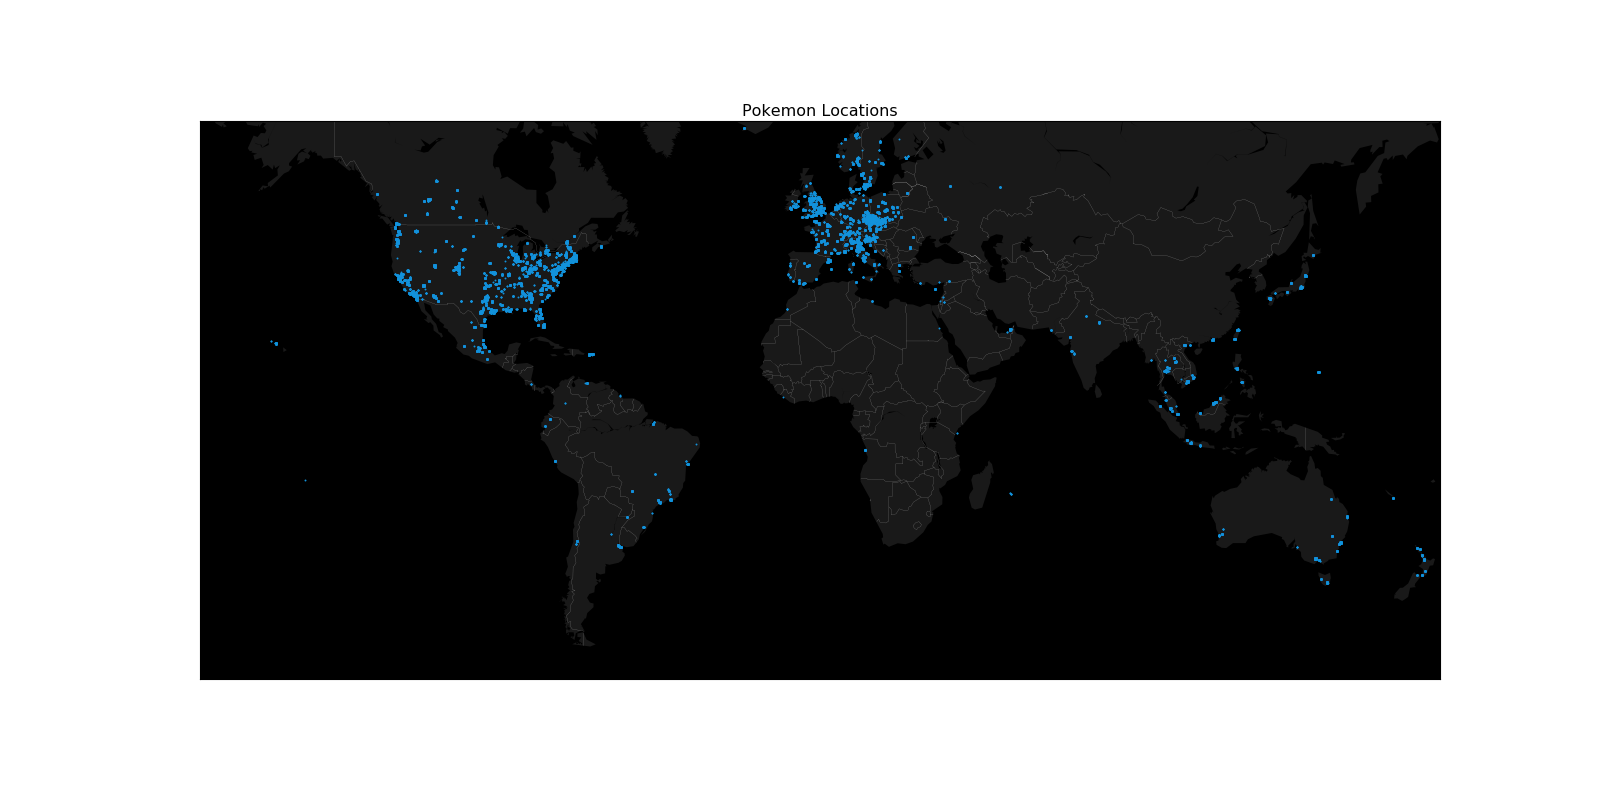

In [8]:
plt.figure(1, figsize=(20, 10))
pokemon_location_map = Basemap(projection='merc',
                               llcrnrlat=-60,
                               urcrnrlat=65,
                               llcrnrlon=-180,
                               urcrnrlon=180,
                               lat_ts=0,
                               resolution='c')

pokemon_location_map.fillcontinents(color='#191919', lake_color='#000000') # dark grey land, black lakes
pokemon_location_map.drawmapboundary(fill_color='#000000') # black background
pokemon_location_map.drawcountries(linewidth=0.1, color="w") # thin white line for country borders

x, y = pokemon_location_map(pokemon_data_df['longitude'].tolist(), pokemon_data_df['latitude'].tolist())
pokemon_location_map.scatter(x, y, s=3, c='#1292db', lw=0, alpha=1, zorder=5)

plt.title("Pokemon Locations")
plt.show()

## Plotting the location of Pokemon through the course of the day

This animated graph shows the locations where Pokemon appeared at each hour of the day

<IPython.core.display.Javascript object>


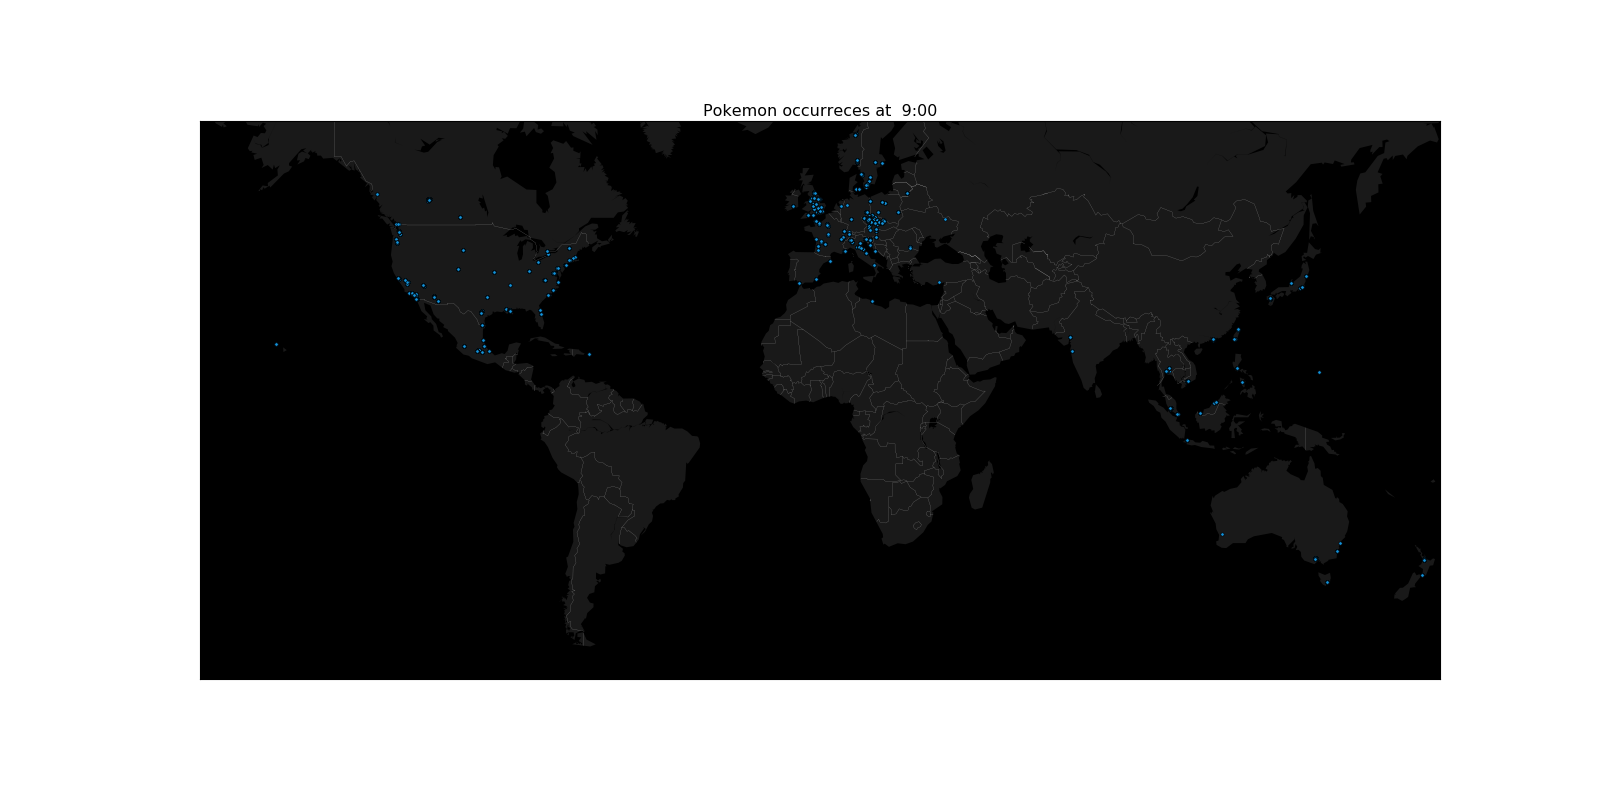

In [10]:
time_groups = pokemon_data_df.groupby('appearedHour')

plt.figure(1, figsize=(20,10))
hourly_map = map = Basemap(projection='merc', 
                           llcrnrlat=-60,
                           urcrnrlat=65,
                           llcrnrlon=-180,
                           urcrnrlon=180,
                           lat_ts=0,
                           resolution='c')

hourly_map.fillcontinents(color='#191919',lake_color='#000000') 
hourly_map.drawmapboundary(fill_color='#000000')                
hourly_map.drawcountries(linewidth=0.1, color="w")              

x,y = hourly_map(0, 0)
point = hourly_map.plot(x, y, 'o', markersize=3, color='#1292db')[0]
def init():
    point.set_data([], [])
    return point,

def animate(i):
    lon = time_groups.get_group(i)['longitude'].values
    lat = time_groups.get_group(i)['latitude'].values
    x, y = hourly_map(lon ,lat)
    point.set_data(x,y)
    plt.title('Pokemon occurreces at %2d:00' % (i))
    return point,

output = animation.FuncAnimation(plt.gcf(), animate, init_func=init, frames=24, interval=2000, blit=True, repeat=True)
plt.show()